In [1]:
from shephard.apis import uniprot
from shephard.interfaces import si_domains

import matplotlib.pyplot as plt

In [2]:
human_proteome = uniprot.uniprot_fasta_to_proteome('../shprd_data/human_proteome_validated.fasta')
si_domains.add_domains_from_file(human_proteome, '../shprd_data/shprd_domains_human_IDRs_0.420.tsv')

In [3]:
# define sliding window function to take in amino acid sequence  

# .......................................................................................
#
def calculate_sliding_window_fraction(sequence, target_residues, window_size=7):
    """
    Function the returns a vetorized represtntation of the local composition of 
    amino acids as defined by the target residues and the window size.
    
    Parameters
    ------------
    sequence : str
        string the composed of a valid amino acid
    
    target_residues : list
        List where each element should be a valid amino acid
        
    window_size : int
        Number of residues over which local sequence properties are calculated. A 
        window stepsize of 1 is always used.
        
    Returns
    ----------
    list
        Returns a list of floating values that defines the density of the set of amino
        acids in the composition_list.
    """
    
    slen = len(sequence)
    
    def FX(s, t, slen):
        return s.count(t) / slen
    
    # run through window_size fragments and compute fraction of target amino acids 
    end = (slen - window_size)+1
    track_vals = []
    for i in range(slen):
        frag = sequence[i:i+window_size]
        track_vals.append(sum([FX(frag, t, slen) for t in target_residues]))
    
    return track_vals

In [4]:
## EXAMPLE to calculate sliding window accross entire sequence

# add fraction of polar residues track to every protein in human proteome 

target_residues = ['S','T','N','Q']

for p in human_proteome:
    polar_track = calculate_sliding_window_fraction(p.sequence, target_residues, window_size=7)
    p.add_track('fraction_polar', values=polar_track) 
                

/Users/Garrett/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


Text(0.5, 0, 'Number of Residues')

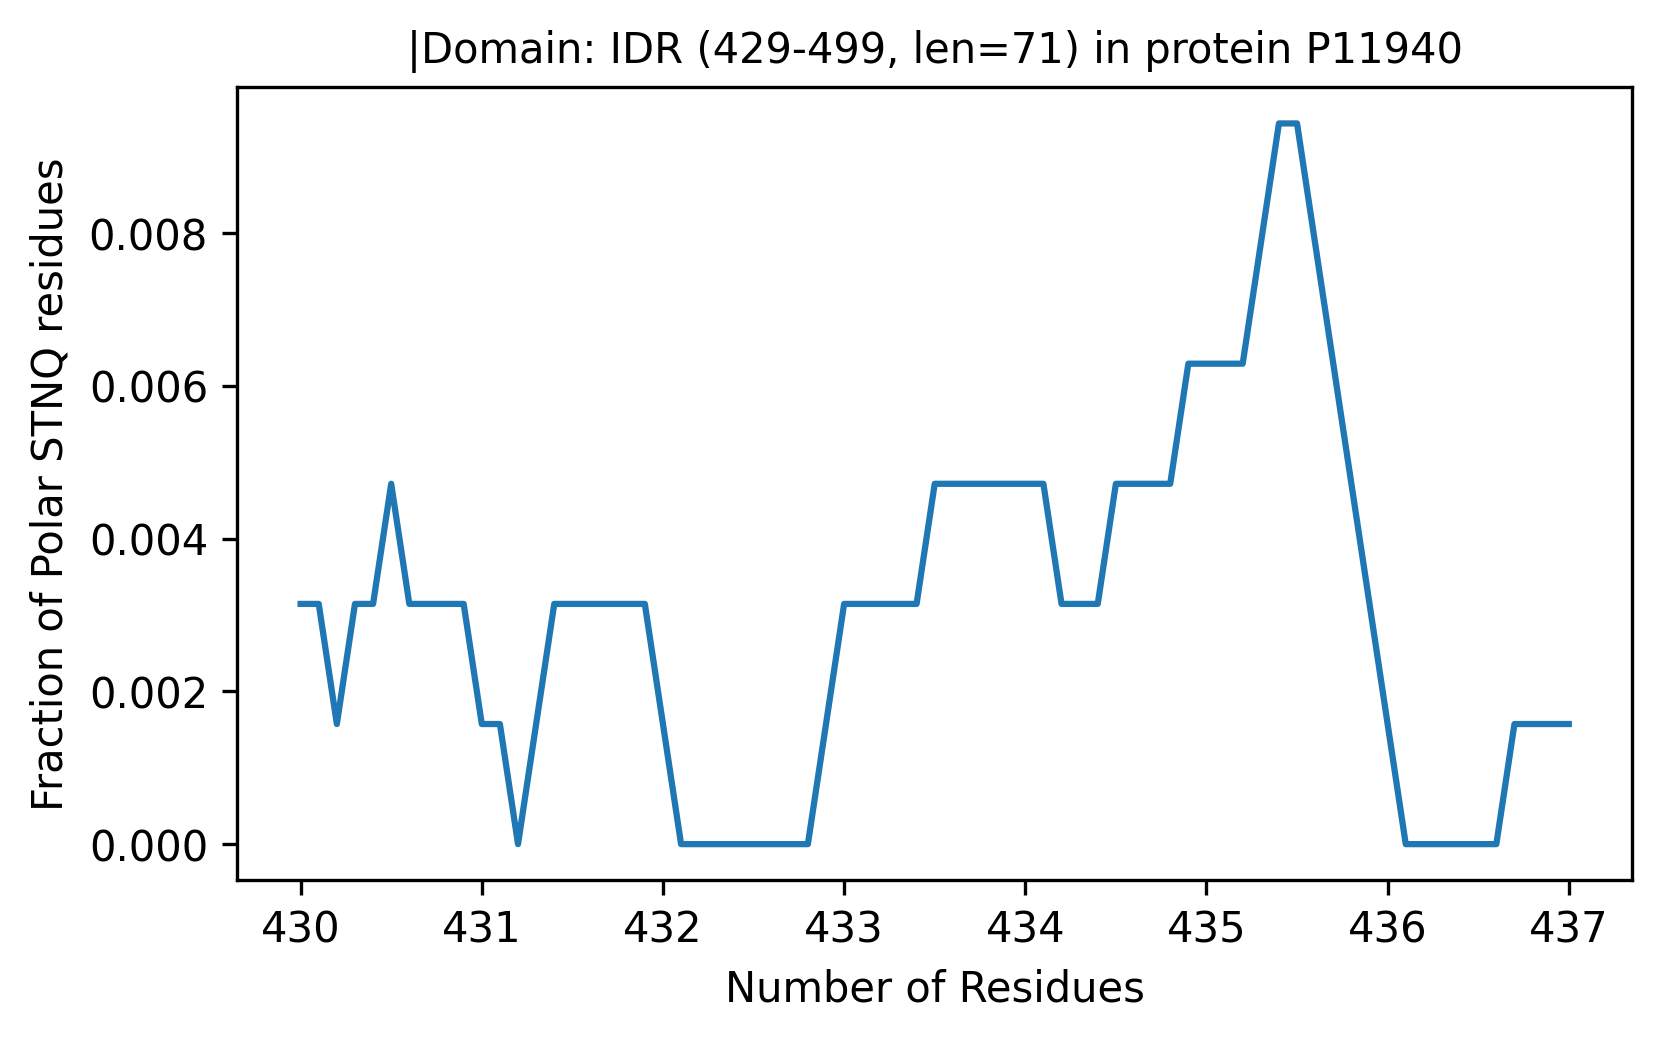

In [84]:
## EXAMPLE to now get the polar track for just domain for as specifc IDR domain

d = human_proteome.protein('P11940').domains[0]

domain_info = d
polar_track = d.get_track_values('fraction_polar')
domain_seq = d.sequence
domain_start = d.start


# plot 
f, ax = plt.subplots(1,1 ,figsize=(6, 3.5), dpi=300, facecolor='w', edgecolor='k',)
ax.plot(polar_track)
ax.set_title(f'{domain_info}', fontsize=10)
ax.set_ylabel('Fraction of Polar %s residues' % ''.join(target_residues))
xlabels =  [i+domain_start for i in range(len(domain_seq))]
ax.set_xticklabels(labels=xlabels)
ax.set_xlabel('Number of Residues')